# SciPy Linear Algebra

### Matrix Operations and Decompositions


In [1]:
import scipy

In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

np.random.seed(42)

## 1. Matrix Decompositions

### 1.1 LU Decomposition - Solving Linear Systems

In [4]:
# Solving circuit equations
# System: 3 equations for electrical circuit currents

A = np.array([
    [2, -1, 0],
    [-1, 3, -1],
    [0, -1, 2]
])

b = np.array([1, 8, 3])  # Voltage sources

# LU decomposition (for display)
P, L, U = linalg.lu(A)

print("Original Matrix A:")
print(A)
print("\nPermutation Matrix P:")
print(P)
print("\nLower Triangular L:")
print(L)
print("\nUpper Triangular U:")
print(U)

# Verify: P @ A = L @ U
print(f"\nReconstruction error: {np.linalg.norm(P @ A - L @ U):.2e}")

# Use lu_factor + lu_solve to solve (correct API)
lu_and_piv = linalg.lu_factor(A)
x = linalg.lu_solve(lu_and_piv, b)
print(f"\nSolution (currents): {x}")
print(f"Verification A @ x = {A @ x}")

Original Matrix A:
[[ 2 -1  0]
 [-1  3 -1]
 [ 0 -1  2]]

Permutation Matrix P:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Lower Triangular L:
[[ 1.   0.   0. ]
 [-0.5  1.   0. ]
 [ 0.  -0.4  1. ]]

Upper Triangular U:
[[ 2.  -1.   0. ]
 [ 0.   2.5 -1. ]
 [ 0.   0.   1.6]]

Reconstruction error: 0.00e+00

Solution (currents): [3. 5. 4.]
Verification A @ x = [1. 8. 3.]


### 1.2 QR Decomposition - Least Squares Problems

Linear Regression Results:
  Intercept: $68.97k
  Slope: $0.1748k per sq ft

Equation: Price = 68.97 + 0.1748 * Size

R-squared: 0.9982


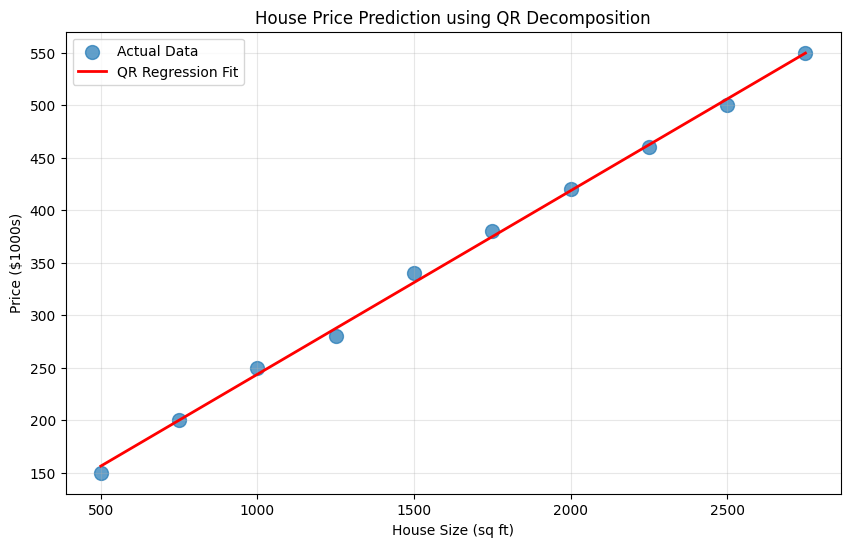

In [14]:
# Linear regression using QR
# Predicting house prices based on size

# Data: house sizes (sq ft) and prices ($1000s)
sizes = np.array([500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750])
prices = np.array([150, 200, 250, 280, 340, 380, 420, 460, 500, 550])

# Design matrix (add column of 1s for intercept)
X = np.column_stack([np.ones(len(sizes)), sizes])
y = prices

# QR decomposition in economic/reduced mode so R is square (n x n)
Q, R = linalg.qr(X, mode='economic')  # Q: (m,n), R: (n,n)

# Solve for coefficients: R @ beta = Q.T @ y
beta = linalg.solve(R, Q.T @ y)

intercept, slope = beta
print(f"Linear Regression Results:")
print(f"  Intercept: ${intercept:.2f}k")
print(f"  Slope: ${slope:.4f}k per sq ft")
print(f"\nEquation: Price = {intercept:.2f} + {slope:.4f} * Size")

# Predictions
predictions = X @ beta
r_squared = 1 - np.sum((y - predictions)**2) / np.sum((y - np.mean(y))**2)
print(f"\nR-squared: {r_squared:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(sizes, prices, s=100, alpha=0.7, label='Actual Data')
plt.plot(sizes, predictions, 'r-', linewidth=2, label='QR Regression Fit')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.title('House Price Prediction using QR Decomposition')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.3 Cholesky Decomposition - Positive Definite Matrices

In [6]:
# Portfolio variance calculation
# Covariance matrix must be positive definite

# Covariance matrix for 3 assets
cov_matrix = np.array([
    [0.04, 0.01, 0.02],
    [0.01, 0.09, 0.03],
    [0.02, 0.03, 0.16]
])

# Cholesky decomposition: A = L @ L.T
L = linalg.cholesky(cov_matrix, lower=True)

print("Covariance Matrix:")
print(cov_matrix)
print("\nCholesky Factor L:")
print(L)
print(f"\nReconstruction error: {np.linalg.norm(L @ L.T - cov_matrix):.2e}")

# Portfolio weights
weights = np.array([0.4, 0.35, 0.25])

# Portfolio variance using Cholesky (more numerically stable)
# var = w.T @ cov @ w = w.T @ L @ L.T @ w = (L.T @ w).T @ (L.T @ w)
transformed = L.T @ weights
portfolio_variance = transformed.T @ transformed
portfolio_std = np.sqrt(portfolio_variance)

print(f"\nPortfolio Analysis:")
print(f"  Weights: {weights}")
print(f"  Variance: {portfolio_variance:.6f}")
print(f"  Standard Deviation (Risk): {portfolio_std:.4f} = {portfolio_std*100:.2f}%")

Covariance Matrix:
[[0.04 0.01 0.02]
 [0.01 0.09 0.03]
 [0.02 0.03 0.16]]

Cholesky Factor L:
[[0.2        0.         0.        ]
 [0.05       0.29580399 0.        ]
 [0.1        0.08451543 0.37796447]]

Reconstruction error: 2.91e-17

Portfolio Analysis:
  Weights: [0.4  0.35 0.25]
  Variance: 0.039475
  Standard Deviation (Risk): 0.1987 = 19.87%


### 1.4 Eigenvalue Decomposition - PCA Foundation

Eigenvalue Analysis:
PC1: Eigenvalue = 5.0034, Explained Var = 64.47%, Cumulative = 64.47%
     Loadings: [0.68262505 0.59843923 0.41939663]
PC2: Eigenvalue = 1.9155, Explained Var = 24.68%, Cumulative = 89.15%
     Loadings: [ 0.68888529 -0.33547005 -0.64257054]
PC3: Eigenvalue = 0.8417, Explained Var = 10.85%, Cumulative = 100.00%
     Loadings: [ 0.24384441 -0.72755092  0.64125624]

Original data shape: (200, 3)
Reduced data shape: (200, 2)
Variance retained: 89.15%


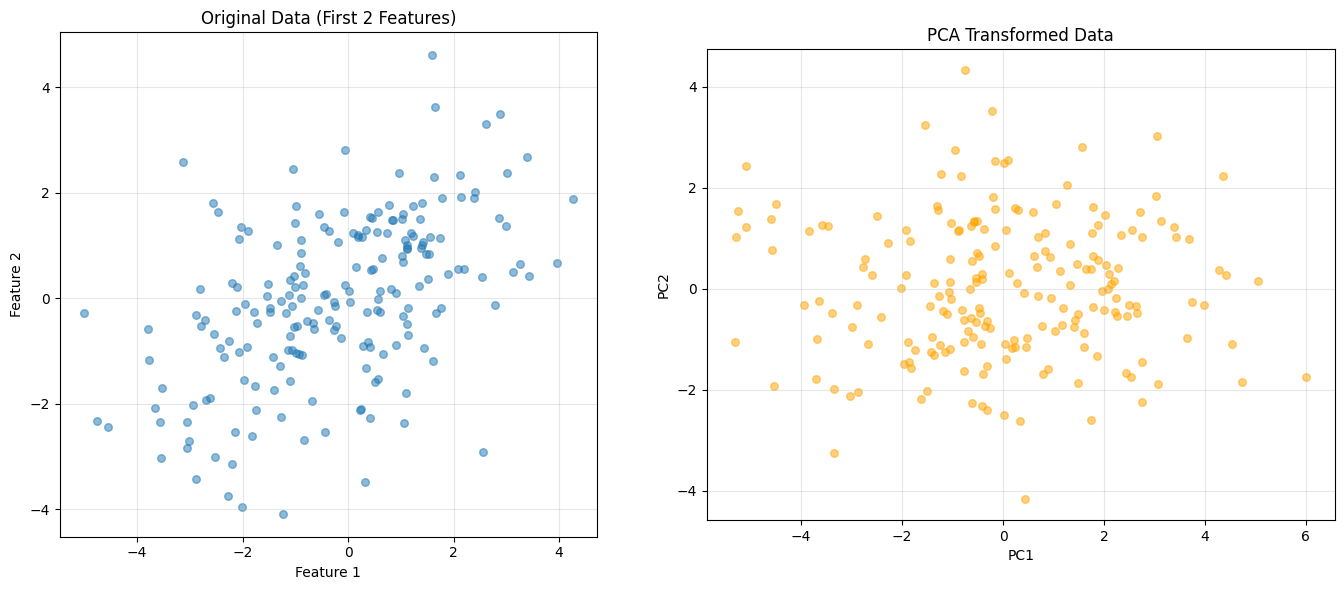

In [7]:
# Principal Component Analysis (PCA)
# Dimensionality reduction for feature analysis

# Generate synthetic dataset with correlated features
np.random.seed(42)
n_samples = 200

# Create correlated features (like in real datasets)
mean = [0, 0, 0]
cov = [
    [4, 2, 1],   # Feature 1 has high variance
    [2, 3, 1.5], # Feature 2 correlated with 1
    [1, 1.5, 2]  # Feature 3 less important
]

data = np.random.multivariate_normal(mean, cov, n_samples)

# Center the data
data_centered = data - data.mean(axis=0)

# Covariance matrix
cov_matrix = np.cov(data_centered.T)

# Eigenvalue decomposition
eigenvalues, eigenvectors = linalg.eigh(cov_matrix)

# Sort by eigenvalues (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalue Analysis:")
print("="*50)
total_var = np.sum(eigenvalues)
for i, (eigval, eigvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
    explained_var = eigval / total_var * 100
    cumulative_var = np.sum(eigenvalues[:i+1]) / total_var * 100
    print(f"PC{i+1}: Eigenvalue = {eigval:.4f}, "
          f"Explained Var = {explained_var:.2f}%, "
          f"Cumulative = {cumulative_var:.2f}%")
    print(f"     Loadings: {eigvec}")

# Transform data to principal components
data_pca = data_centered @ eigenvectors[:, :2]  # Keep top 2 PCs

print(f"\nOriginal data shape: {data.shape}")
print(f"Reduced data shape: {data_pca.shape}")
print(f"Variance retained: {np.sum(eigenvalues[:2])/total_var*100:.2f}%")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original data (first 2 features)
axes[0].scatter(data[:, 0], data[:, 1], alpha=0.5, s=30)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Original Data (First 2 Features)')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# PCA transformed data
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5, s=30, c='orange')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('PCA Transformed Data')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

### 1.5 Singular Value Decomposition (SVD) - Matrix Factorization

Original image shape: (100, 100)
Singular values (top 10): [5.00007668e+01 2.49922153e+01 9.30287633e-15 4.56002686e-15
 4.56002686e-15 4.56002686e-15 4.56002686e-15 4.56002686e-15
 4.56002686e-15 4.56002686e-15]
Total singular values: 100
Components for 90% energy: 2
Components for 95% energy: 2
Components for 99% energy: 2


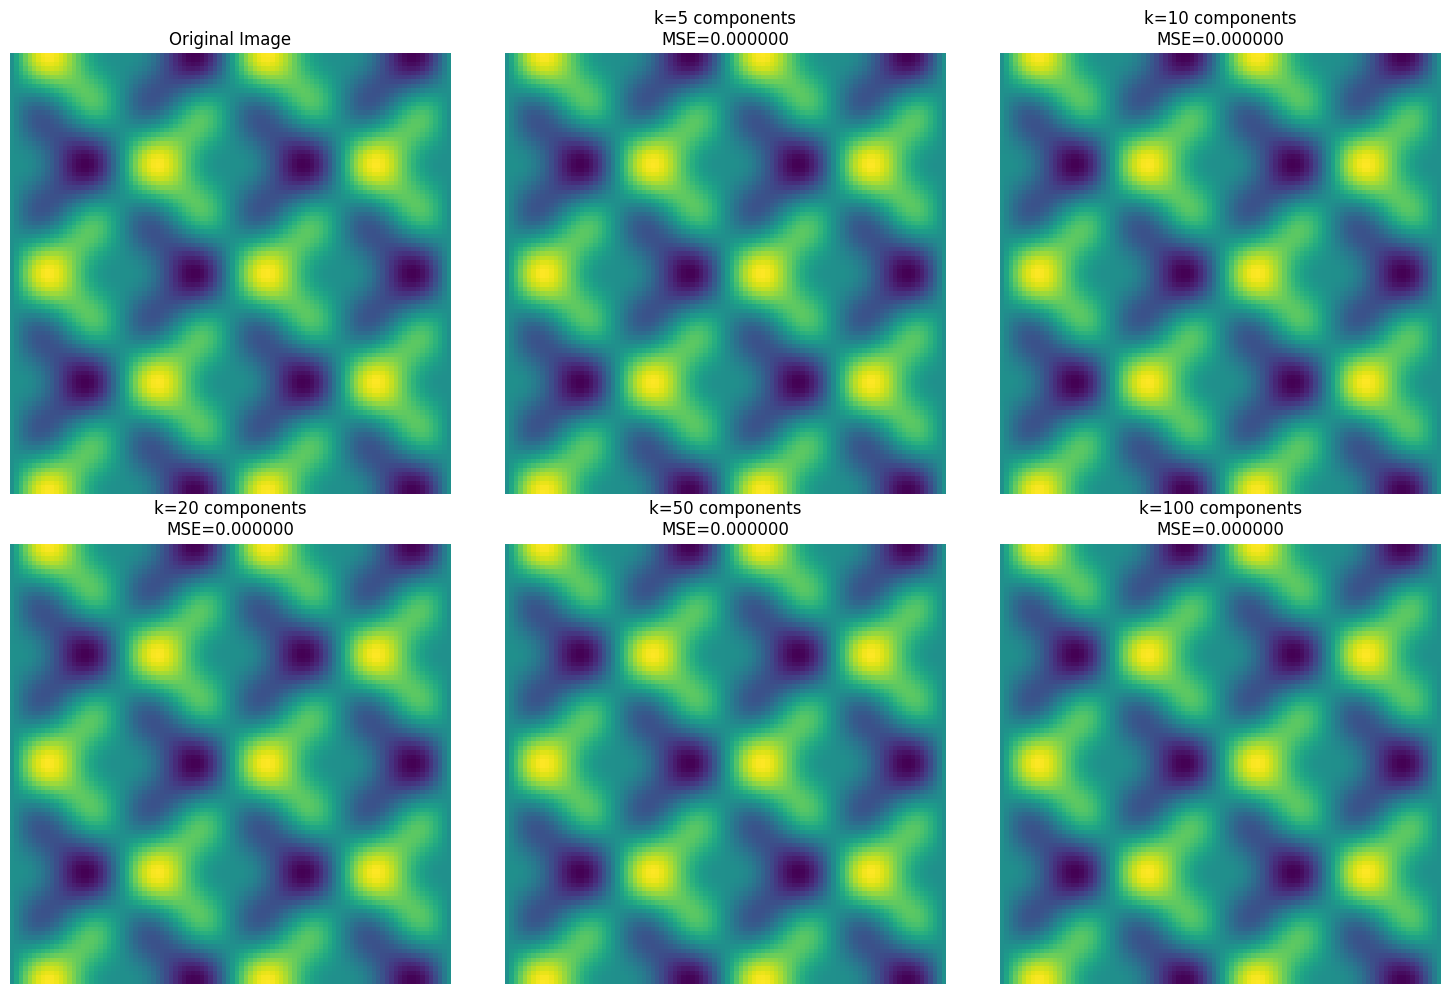

k=10: Compression ratio = 4.98x
k=20: Compression ratio = 2.49x
k=50: Compression ratio = 1.00x


In [8]:
# Image compression using SVD
# Also used in recommendation systems (matrix factorization)

# Create a synthetic "image" (gradient pattern)
x = np.linspace(0, 4*np.pi, 100)
y = np.linspace(0, 4*np.pi, 100)
X, Y = np.meshgrid(x, y)
image = np.sin(X) * np.cos(Y)

# Add some structure
image = image + 0.5 * np.sin(2*X) * np.cos(2*Y)

# SVD decomposition
U, s, Vt = linalg.svd(image, full_matrices=False)

print(f"Original image shape: {image.shape}")
print(f"Singular values (top 10): {s[:10]}")
print(f"Total singular values: {len(s)}")

# Cumulative energy
cumulative_energy = np.cumsum(s**2) / np.sum(s**2)

# Find how many components for 90%, 95%, 99% energy
for threshold in [0.90, 0.95, 0.99]:
    n_comp = np.argmax(cumulative_energy >= threshold) + 1
    print(f"Components for {threshold*100:.0f}% energy: {n_comp}")

# Reconstruct with different numbers of components
def svd_reconstruct(U, s, Vt, k):
    return U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

# Visualize reconstructions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

k_values = [5, 10, 20, 50, 100]
axes[0, 0].imshow(image, cmap='viridis', aspect='equal')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for idx, k in enumerate(k_values):
    row = (idx + 1) // 3
    col = (idx + 1) % 3
    
    reconstructed = svd_reconstruct(U, s, Vt, k)
    mse = np.mean((image - reconstructed)**2)
    
    axes[row, col].imshow(reconstructed, cmap='viridis', aspect='equal')
    axes[row, col].set_title(f'k={k} components\nMSE={mse:.6f}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Compression ratio
original_size = image.size
for k in [10, 20, 50]:
    compressed_size = k * (U.shape[0] + Vt.shape[1] + 1)
    ratio = original_size / compressed_size
    print(f"k={k}: Compression ratio = {ratio:.2f}x")

## 2. Matrix Operations for Machine Learning

### 2.1 Matrix Inversion and Pseudoinverse

In [9]:
# Linear regression with pseudoinverse
# Works even when X is not full rank

# Dataset with more features than samples (underdetermined)
np.random.seed(42)
X = np.random.randn(5, 10)  # 5 samples, 10 features
y = np.random.randn(5)

# Moore-Penrose pseudoinverse
X_pinv = linalg.pinv(X)

# Minimum norm solution
weights = X_pinv @ y

print(f"X shape: {X.shape}")
print(f"Pseudoinverse shape: {X_pinv.shape}")
print(f"Weights shape: {weights.shape}")

# Verify: X @ weights ≈ y
y_pred = X @ weights
print(f"\nPrediction error: {np.linalg.norm(y - y_pred):.6f}")

# Verify pseudoinverse properties
print(f"\nPseudoinverse properties:")
print(f"X @ X+ @ X ≈ X: {np.allclose(X @ X_pinv @ X, X)}")
print(f"X+ @ X @ X+ ≈ X+: {np.allclose(X_pinv @ X @ X_pinv, X_pinv)}")

X shape: (5, 10)
Pseudoinverse shape: (10, 5)
Weights shape: (10,)

Prediction error: 0.000000

Pseudoinverse properties:
X @ X+ @ X ≈ X: True
X+ @ X @ X+ ≈ X+: True


### 2.2 Matrix Norms - Regularization

Weight Vector Comparison:

Ridge Regression:
  Weights: [0.5  0.3  0.2  0.1  0.05]
  L1 Norm: 1.1500
  L2 Norm: 0.6265
  L∞ Norm: 0.5000
  Non-zero weights: 5/5

Lasso Regression:
  Weights: [0.8  0.   0.   0.15 0.  ]
  L1 Norm: 0.9500
  L2 Norm: 0.8139
  L∞ Norm: 0.8000
  Non-zero weights: 2/5


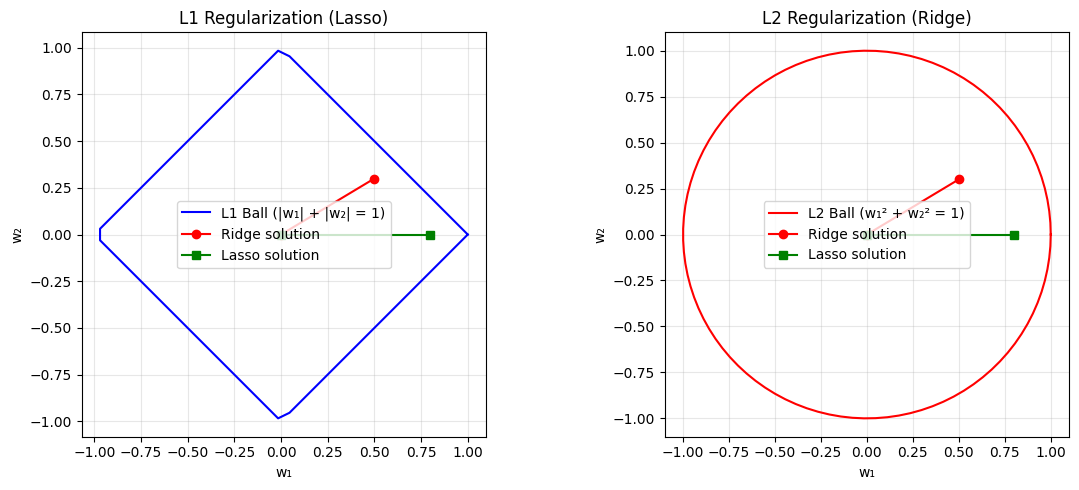

In [10]:
# Regularization in machine learning
# L1 (Lasso) and L2 (Ridge) norms

# Sample weight vectors from different models
weights_ridge = np.array([0.5, 0.3, 0.2, 0.1, 0.05])
weights_lasso = np.array([0.8, 0.0, 0.0, 0.15, 0.0])  # Sparse

print("Weight Vector Comparison:")
print("="*50)

for name, w in [('Ridge', weights_ridge), ('Lasso', weights_lasso)]:
    l1_norm = linalg.norm(w, 1)
    l2_norm = linalg.norm(w, 2)
    l_inf = linalg.norm(w, np.inf)
    non_zero = np.sum(w != 0)
    
    print(f"\n{name} Regression:")
    print(f"  Weights: {w}")
    print(f"  L1 Norm: {l1_norm:.4f}")
    print(f"  L2 Norm: {l2_norm:.4f}")
    print(f"  L∞ Norm: {l_inf:.4f}")
    print(f"  Non-zero weights: {non_zero}/{len(w)}")

# Visualize regularization effect
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# L1 ball (diamond)
theta = np.linspace(0, 2*np.pi, 100)
l1_x = np.cos(theta) / (np.abs(np.cos(theta)) + np.abs(np.sin(theta)))
l1_y = np.sin(theta) / (np.abs(np.cos(theta)) + np.abs(np.sin(theta)))
axes[0].plot(l1_x, l1_y, 'b-', label='L1 Ball (|w₁| + |w₂| = 1)')
axes[0].plot([0, weights_ridge[0]], [0, weights_ridge[1]], 'ro-', label='Ridge solution')
axes[0].plot([0, weights_lasso[0]], [0, weights_lasso[1]], 'gs-', label='Lasso solution')
axes[0].set_title('L1 Regularization (Lasso)')
axes[0].set_xlabel('w₁')
axes[0].set_ylabel('w₂')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# L2 ball (circle)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
axes[1].plot(circle_x, circle_y, 'r-', label='L2 Ball (w₁² + w₂² = 1)')
axes[1].plot([0, weights_ridge[0]], [0, weights_ridge[1]], 'ro-', label='Ridge solution')
axes[1].plot([0, weights_lasso[0]], [0, weights_lasso[1]], 'gs-', label='Lasso solution')
axes[1].set_title('L2 Regularization (Ridge)')
axes[1].set_xlabel('w₁')
axes[1].set_ylabel('w₂')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

### 2.3 Kronecker Product - Feature Interactions

In [11]:
# Creating polynomial features
# Used in feature engineering for ML

# Base features
x1 = np.array([1, 2, 3])
x2 = np.array([1, 1, 1])  # Bias term

# Create interaction features using Kronecker product
features = np.array([x1, x2])

# Kronecker product for feature interactions
interaction = np.kron(features.T, features.T)

print("Base features:")
print(f"  x1: {x1}")
print(f"  x2: {x2} (bias)")
print(f"\nInteraction matrix shape: {interaction.shape}")
print("\nFirst 3 rows of interaction features:")
print(interaction[:3])

# Application: Creating polynomial kernel features
print("\n" + "="*50)
print("Polynomial Feature Expansion Example:")

# Original 2D features
X_orig = np.array([[1, 2], [3, 4], [5, 6]])
print(f"\nOriginal features shape: {X_orig.shape}")
print(X_orig)

# Add bias and create polynomial features
X_bias = np.column_stack([np.ones(len(X_orig)), X_orig])

# Second-order polynomial via Kronecker
X_poly = np.zeros((len(X_orig), 6))  # 1, x1, x2, x1², x1*x2, x2²
for i in range(len(X_orig)):
    x = X_bias[i]
    X_poly[i] = [1, x[1], x[2], x[1]**2, x[1]*x[2], x[2]**2]

print(f"\nPolynomial features shape: {X_poly.shape}")
print(X_poly)

Base features:
  x1: [1 2 3]
  x2: [1 1 1] (bias)

Interaction matrix shape: (9, 4)

First 3 rows of interaction features:
[[1 1 1 1]
 [2 1 2 1]
 [3 1 3 1]]

Polynomial Feature Expansion Example:

Original features shape: (3, 2)
[[1 2]
 [3 4]
 [5 6]]

Polynomial features shape: (3, 6)
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]


## 3. Advanced Applications

### 3.1 Solving Linear Systems - Neural Network Layer

In [12]:
# Linear layer in neural network
# Forward and backward pass using linear algebra

class LinearLayer:
    """Simple linear layer using scipy.linalg"""
    
    def __init__(self, input_dim, output_dim):
        # Xavier initialization
        self.W = np.random.randn(input_dim, output_dim) * np.sqrt(2.0 / input_dim)
        self.b = np.zeros(output_dim)
        self.input = None
    
    def forward(self, x):
        self.input = x
        return x @ self.W + self.b
    
    def backward(self, grad_output):
        # Gradient w.r.t. weights
        self.grad_W = self.input.T @ grad_output
        # Gradient w.r.t. bias
        self.grad_b = np.sum(grad_output, axis=0)
        # Gradient w.r.t. input
        return grad_output @ self.W.T

# Create a simple layer
layer = LinearLayer(5, 3)

# Sample input (batch of 4 samples)
x = np.random.randn(4, 5)

# Forward pass
output = layer.forward(x)

# Sample gradient from loss
grad_output = np.random.randn(4, 3)

# Backward pass
grad_input = layer.backward(grad_output)

print("Linear Layer Example:")
print(f"Input shape: {x.shape}")
print(f"Weight matrix shape: {layer.W.shape}")
print(f"Output shape: {output.shape}")
print(f"\nWeight gradients shape: {layer.grad_W.shape}")
print(f"Input gradients shape: {grad_input.shape}")
print(f"\nWeight matrix (first 3x3):")
print(layer.W[:3, :3])

Linear Layer Example:
Input shape: (4, 5)
Weight matrix shape: (5, 3)
Output shape: (4, 3)

Weight gradients shape: (5, 3)
Input gradients shape: (4, 5)

Weight matrix (first 3x3):
[[ 0.58899326 -0.53076777 -0.19556308]
 [ 0.20950939  0.61698891 -0.3030564 ]
 [-0.11742105 -0.69970767 -0.7565475 ]]


### 3.2 Condition Number - Numerical Stability

In [15]:
# Checking matrix stability for ML
# High condition number = numerical instability

# Well-conditioned matrix
A_well = np.array([
    [1, 0.5, 0.3],
    [0.5, 1, 0.4],
    [0.3, 0.4, 1]
])

# Ill-conditioned matrix (nearly singular)
A_ill = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9.0001]  # Almost linearly dependent
])

print("Condition Number Analysis:")
print("="*50)

for name, A in [('Well-conditioned', A_well), ('Ill-conditioned', A_ill)]:
    cond = np.linalg.cond(A)
    det = np.linalg.det(A)
    eigvals = linalg.eigvals(A)
    
    print(f"\n{name} Matrix:")
    print(f"  Determinant: {det:.6f}")
    print(f"  Condition Number: {cond:.2e}")
    print(f"  Eigenvalues: {np.abs(eigvals)}")
    print(f"  Stability: {'Good' if cond < 1000 else 'Poor'}")

# Demonstrate sensitivity to perturbations
print("\n" + "="*50)
print("Sensitivity Analysis:")

b = np.array([1, 2, 3])
x = linalg.solve(A_ill, b)

# Small perturbation
b_perturbed = b + 0.001 * np.random.randn(3)
x_perturbed = linalg.solve(A_ill, b_perturbed)

relative_change_b = np.linalg.norm(b_perturbed - b) / np.linalg.norm(b)
relative_change_x = np.linalg.norm(x_perturbed - x) / np.linalg.norm(x)

print(f"\nRelative change in b: {relative_change_b:.6f}")
print(f"Relative change in x: {relative_change_x:.6f}")
print(f"Amplification factor: {relative_change_x / relative_change_b:.2f}")
print(f"Condition number: {np.linalg.cond(A_ill):.2e}")

Condition Number Analysis:

Well-conditioned Matrix:
  Determinant: 0.620000
  Condition Number: 3.75e+00
  Eigenvalues: [1.80558104 0.48197322 0.71244574]
  Stability: Good

Ill-conditioned Matrix:
  Determinant: -0.000300
  Condition Number: 1.01e+06
  Eigenvalues: [1.61169016e+01 1.11681826e+00 1.66669907e-05]
  Stability: Poor

Sensitivity Analysis:

Relative change in b: 0.000237
Relative change in x: 36.168133
Amplification factor: 152535.52
Condition number: 1.01e+06
